## Global Power Plant Database

### Problem Statement:
##### Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
country_long (text): longer form of the country designation
name (text): name or title of the power plant, generally in Romanized form
gppd_idnr (text): 10 or 12 character identifier for the power plant
capacity_mw (number): electrical generating capacity in megawatts
latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
primary_fuel (text): energy source used in primary electricity generation or export
other_fuel1 (text): energy source used in electricity generation or export
other_fuel2 (text): energy source used in electricity generation or export
other_fuel3 (text): energy source used in electricity generation or export
commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
owner (text): majority shareholder of the power plant, generally in Romanized form
source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url (text): web document corresponding to the source field
geolocation_source (text): attribution for geolocation information
wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
year_of_capacity_data (number): year the capacity information was reported
generation_data_source (text): attribution for the reported generation information
generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

### Prediction:
Make two prediction for labels 1) primary_fuel
2) capacity_mw

In [1]:
# Importing libs
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#clssification 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import GridSearchCV

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv(r'power_plant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from the help of pandas library we have imported the csv file into jupyter notebook. this dataset is having 908 columns and 25 rows.The utmost important point is in our dataset we have been asked to predict two label . namely 1.primary_fuel 2.capacity_mw. As far as we can see that our first level primary fuel is having catagorical data so we can say this is our classificatin model. and second capacity_mw is having continous data we will make Regression model .

#### Exploratory Data Analysis(EDA)


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


from above describe.Transpose method we can say that there some columns having high amount of outlier present that need to be treated AS per requirement .



In [6]:
df.shape

(907, 27)

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


from above method it is crytal clean that we have so many missing value in our dataset .some of our columns has very high missing value so i have decided columns having more than 50% missing values need to be dropped .

In [9]:
# the columns having more than 50% missing values
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

In [10]:
df.shape

(907, 13)

Now our columns has become 13 from 27 .



In [12]:
df.nunique().to_frame("unique values")

,unique values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191



from this unique method we have observed that some of our columns have 1 unique value and some of columns have 908 unique value . these both kind of columns are just meaningless for our ML model so we have to drop it now.

column 'url' is having some kind of web document link that is not going to help our model much . we should drop it too.

In [13]:
df.drop(['name','gppd_idnr','country','country_long','year_of_capacity_data'],axis=1,inplace=True)

In [14]:
df.drop('url',axis=1,inplace=True)

In [15]:
print(df.shape)
df.head()

(907, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


now our columns finally reduced to 7.



In [17]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [19]:
#getting list of object_datatypes
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
     object_datatype.append(x)
print('object_datatype=',object_datatype)  

# getting list of float_datatypes
float_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
        float_datatypes.append(x)
print('float_datatype=',float_datatypes)     

object_datatype= ['primary_fuel', 'source', 'geolocation_source']
float_datatype= ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [20]:
# filling the data for continous value with mean.
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode(),inplace=True)

In [21]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [22]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

Now we have no any missing value



In [23]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*100)

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                            

#### Visulization


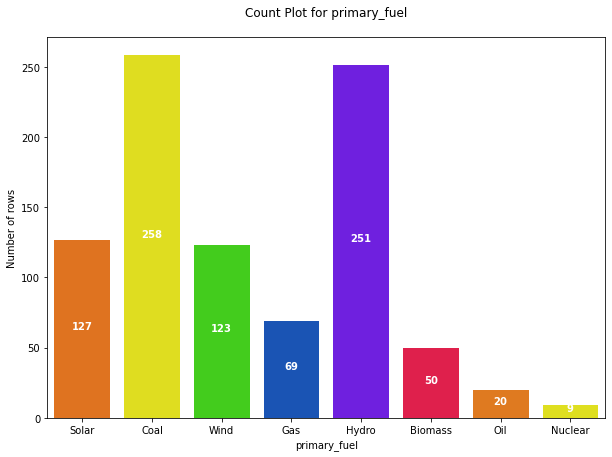

In [24]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

from the above visulizatio we confirm that in primary_fuel highest data is covered bu 'Coal',and 'Hydo'.Here primary_fuel is our targer for classification model so we have to balancr whole data before putting data for model



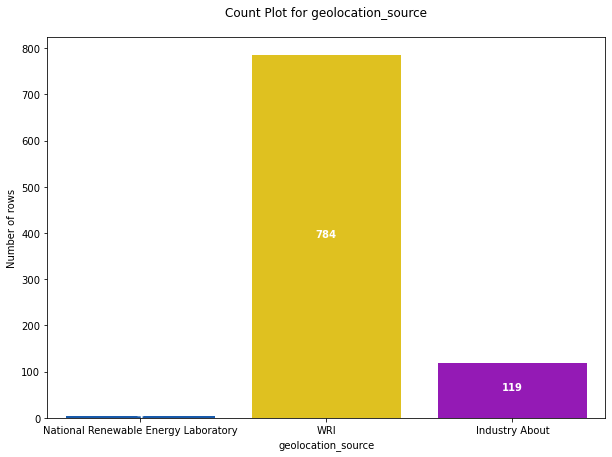

In [25]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.



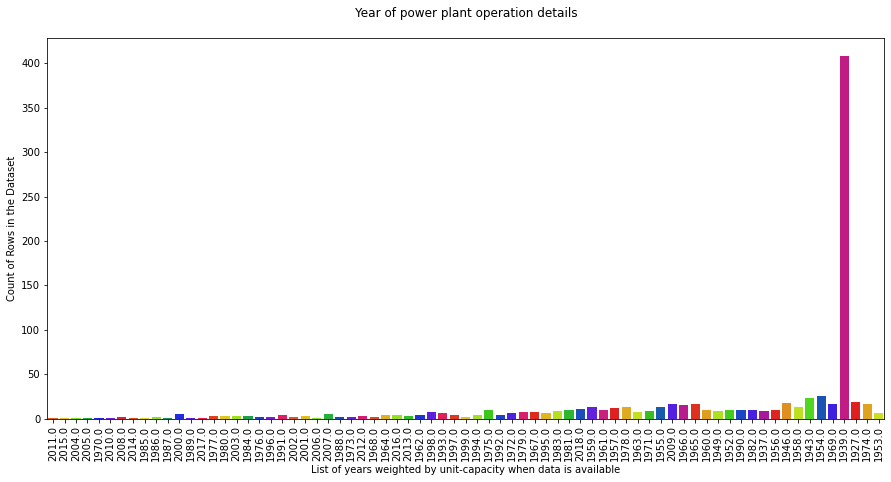

In [26]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.



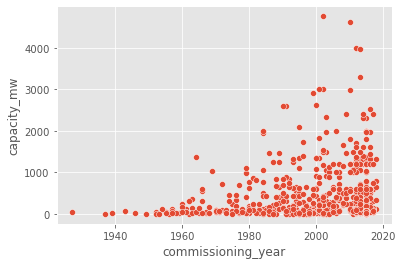

In [27]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

in the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.



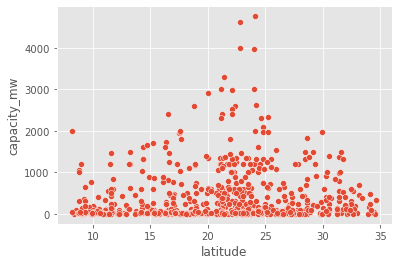

In [28]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.



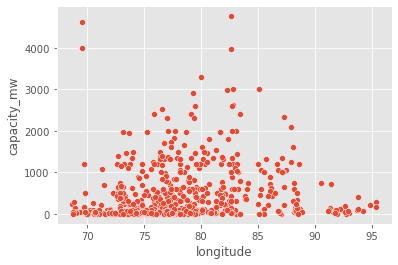

In [29]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

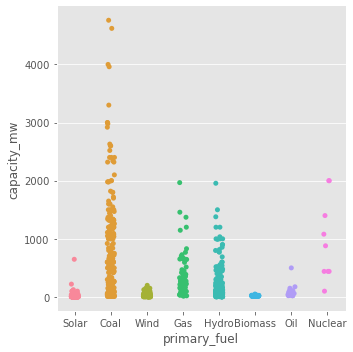

In [30]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

from the above plot we can see that coal is the highest mean to generate electricity



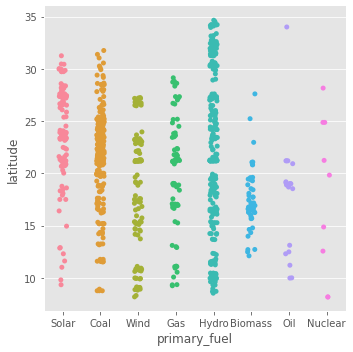

In [31]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

from the above graph we can see that latitude of Hydro is all time high when it comes to generate the electricity



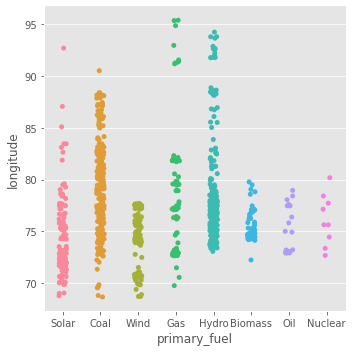

In [32]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

from the above plot we can observe that longitude of hydro is always high when it comes to generate the electicity.



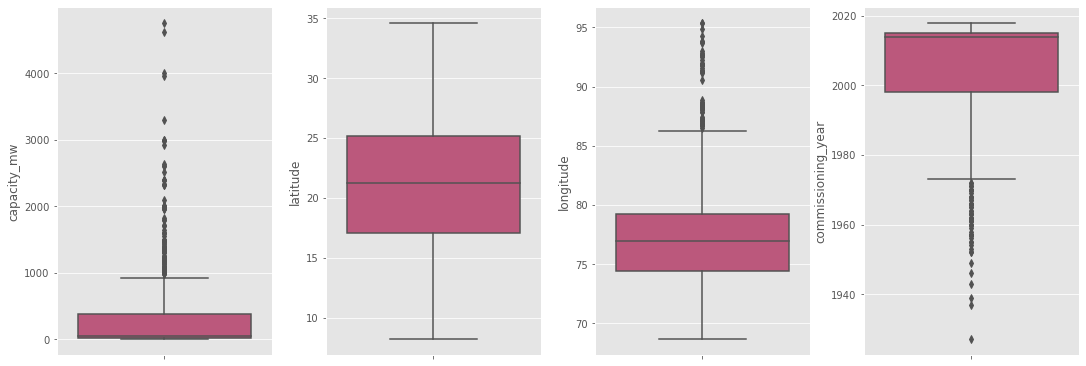

In [33]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index=0
ax=ax.flatten()
for col,values in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette='plasma')
    index+=1
    
plt.tight_layout(pad=.4, w_pad=.4, h_pad=1)
plt.show()

from the above plot we have observed that columns like capacity_mw , longitude, commissioning_year has some outlier present and we need to treat them.



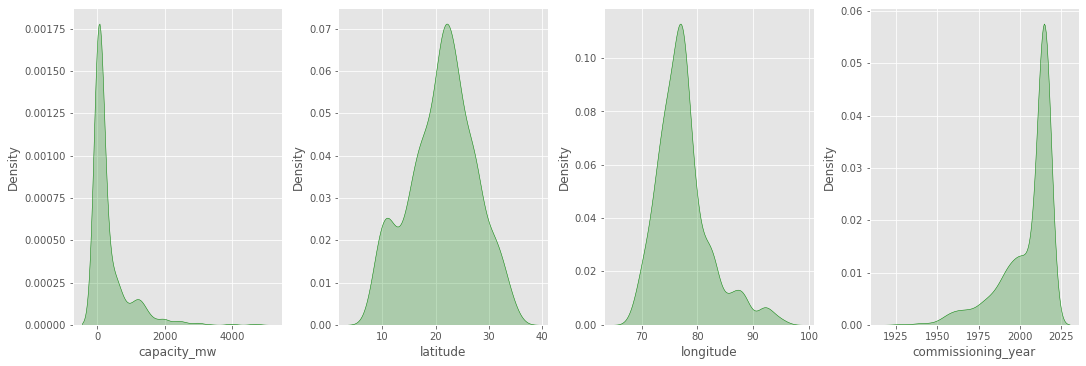

In [34]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

from the above plot we have seen that there are some skewness present in dataset we have to treat them before starting the Model Building processes.



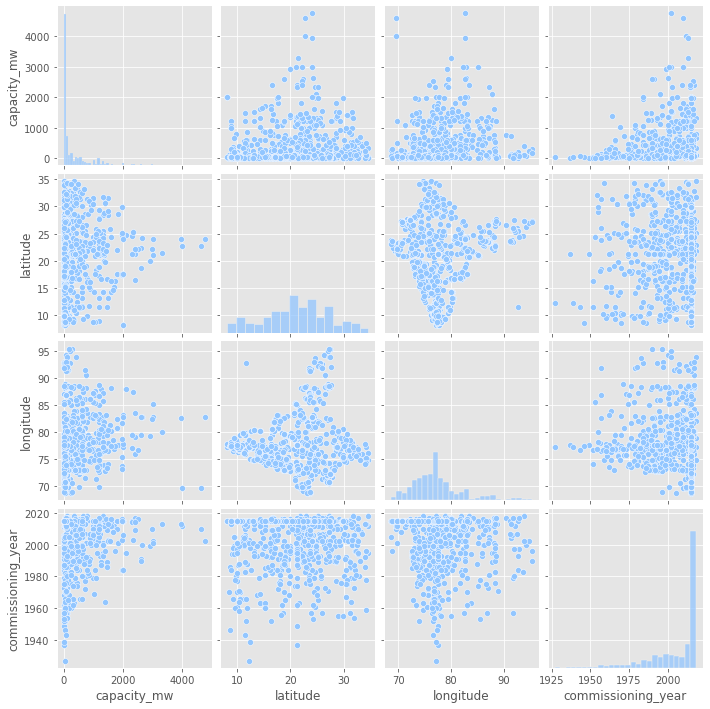

In [35]:
sns.pairplot(df)
plt.show()

#### Encoding all the Object datatype columns


In [36]:
#Label Encoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [37]:
#Ordinal Encoder
oe=OrdinalEncoder()
df['source']=oe.fit_transform(df['source'].values.reshape(-1,1))
df['geolocation_source']=oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [38]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


#### Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

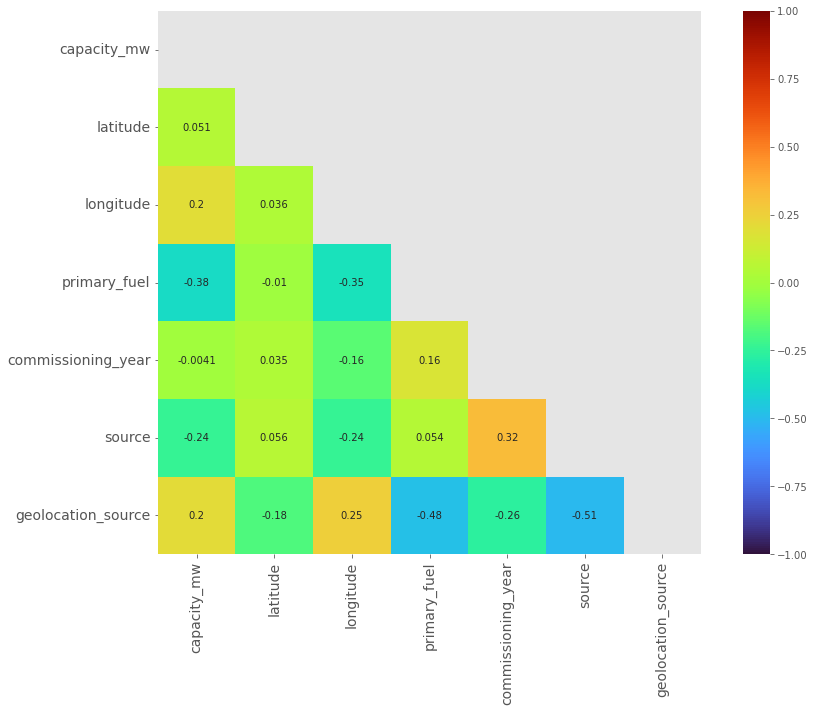

In [39]:
upper_triangle=np.triu(df.corr())
figure=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='turbo',annot=True,square=True,annot_kws={'size':10},mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

from the above heatmap plot we can see that our target/label primary_fuel and capacity_mw has some negative correrelation with some of features . and these feature is not highly correlated to each other . so we dont need to worry.



#### Correlation Bar Plot comparing features with our labels


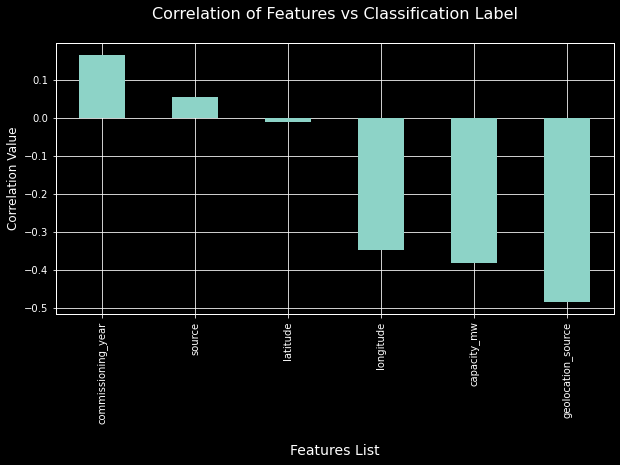

In [40]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

from the above barplot graph between feature and label found two of them are positive and four are negatively .



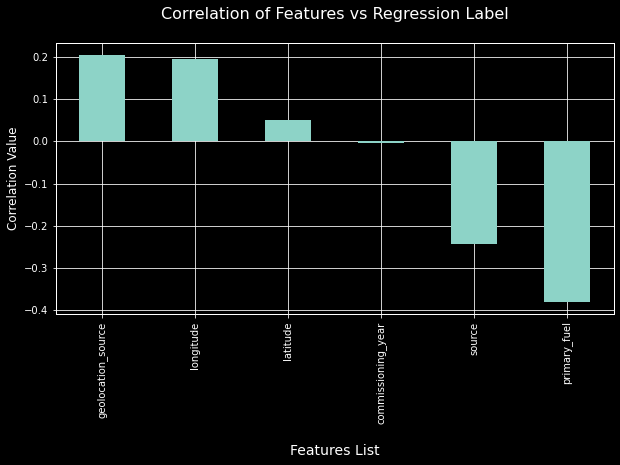

In [41]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

#### Using zscore to remove the outliers


In [42]:
z=np.abs(zscore(df))
threashold=3
df1=df[(z<3).all(axis=1)]
df.shape,df1.shape

((907, 7), (838, 7))

In [43]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
loss

7.6074972436604185

As we have 7 to 8 % data loss so we should proceed ahead with it .



In [44]:
df=df1
df.shape

(838, 7)

In [45]:
df.skew()

capacity_mw           1.967086
latitude             -0.112601
longitude             0.903442
primary_fuel          0.418559
commissioning_year   -1.500521
source                1.792245
geolocation_source   -2.112259
dtype: float64

#### Using Log Transform to fix the skewness


In [46]:
for col in float_datatypes:
    if df.skew().loc[col]>.55:
        df[col]=np.log1p(df[col])

#### spiling whole dataset into two part namely 'X' and 'Y' for training and testing


In [48]:
X=df.drop('primary_fuel',axis=1)
Y=df['primary_fuel']

In [49]:
Y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

#### Treating Imbalance label counts by Over_sampling Smote method


In [50]:
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [51]:
Y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

#### feature Scaling


In [52]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.720164,1.452369,-0.858989,0.402235,1.330503,-1.183794
1,0.174942,0.853687,-0.465721,0.729789,2.752737,0.369891
2,-0.336066,0.352246,-2.011048,0.729789,-0.594984,0.369891
3,0.354983,0.696887,3.843643,-0.170985,-0.573104,0.369891
4,1.819787,0.362144,1.648513,0.729789,-0.573104,0.369891


we have used scaling method as Standard Scaling to avoid the problem of biasness



#### Finding best Random state for Building Classification Model


In [53]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 73.29059829059828 on Random State 118


excellent , we got Random state as 305


#### Machine Learning Model for Classification with Evaluation Metrics


In [54]:
# classification model function
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=305)
    
    #train the model
    model.fit(X_train,Y_train)
    
    #Predicting the Y_test
    pred=model.predict(X_test)
    
    #classification Report
    class_report=classification_report(Y_test,pred)
    print('classification Report',class_report)
    
    #Accuracy score
    accu_score=(accuracy_score(Y_test,pred))*100
    print('accuracy_score',accu_score)
    
    #cross validation 
    cross_val=(cross_val_score(model,X,Y, cv=5).mean())*100
    print('cross_val_score',cross_val)

    
    #final result
    final_result=(accu_score-cross_val)
    print('accuracy score - cross_val =', final_result)

In [55]:
#Logistic Regression
model=LogisticRegression()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.79      0.84      0.82        58
           1       0.54      0.56      0.55        57
           2       0.76      0.37      0.49        52
           3       0.48      0.62      0.54        52
           4       0.74      0.89      0.81        71
           5       0.70      0.43      0.53        54
           6       1.00      0.95      0.97        60
           7       0.79      0.98      0.87        64

    accuracy                           0.72       468
   macro avg       0.72      0.70      0.70       468
weighted avg       0.73      0.72      0.71       468

accuracy_score 72.22222222222221
cross_val_score 67.7361853832442
accuracy score - cross_val = 4.486036838978009


In [56]:
#Decision Tree Classifier
model=DecisionTreeClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.67      0.51      0.58        57
           2       0.71      0.79      0.75        52
           3       0.72      0.81      0.76        52
           4       0.94      0.96      0.95        71
           5       0.91      0.96      0.94        54
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        64

    accuracy                           0.87       468
   macro avg       0.86      0.87      0.86       468
weighted avg       0.87      0.87      0.87       468

accuracy_score 87.3931623931624
cross_val_score 84.82880570409982
accuracy score - cross_val = 2.5643566890625777


In [57]:
#support Vector classifier
model=SVC()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.94      0.86      0.90        58
           1       0.65      0.54      0.59        57
           2       0.77      0.52      0.62        52
           3       0.78      0.73      0.75        52
           4       0.78      1.00      0.88        71
           5       0.78      0.87      0.82        54
           6       1.00      0.93      0.97        60
           7       0.83      0.98      0.90        64

    accuracy                           0.82       468
   macro avg       0.82      0.81      0.80       468
weighted avg       0.82      0.82      0.81       468

accuracy_score 81.83760683760684
cross_val_score 80.71486631016043
accuracy score - cross_val = 1.1227405274464104


In [58]:
#Random Forest Classifier
model=RandomForestClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.76      0.65      0.70        57
           2       0.84      0.81      0.82        52
           3       0.79      0.85      0.81        52
           4       0.90      0.97      0.93        71
           5       0.95      1.00      0.97        54
           6       1.00      0.98      0.99        60
           7       0.97      1.00      0.98        64

    accuracy                           0.90       468
   macro avg       0.90      0.90      0.90       468
weighted avg       0.90      0.90      0.90       468

accuracy_score 90.17094017094017
cross_val_score 90.91921568627453
accuracy score - cross_val = -0.7482755153343561


In [59]:
#AdaBoost Classifier
model=AdaBoostClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.69      0.53      0.60        58
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00        52
           3       0.18      1.00      0.30        52
           4       0.00      0.00      0.00        71
           5       0.06      0.09      0.08        54
           6       1.00      0.95      0.97        60
           7       0.00      0.00      0.00        64

    accuracy                           0.31       468
   macro avg       0.24      0.32      0.24       468
weighted avg       0.24      0.31      0.24       468

accuracy_score 30.982905982905983
cross_val_score 37.23308377896613
accuracy score - cross_val = -6.25017779606015


In [60]:
#KNeighbor Classifier
model=KNeighborsClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.94      0.86      0.90        58
           1       0.74      0.56      0.64        57
           2       0.80      0.77      0.78        52
           3       0.73      0.67      0.70        52
           4       0.87      1.00      0.93        71
           5       0.87      0.96      0.91        54
           6       1.00      1.00      1.00        60
           7       0.86      0.97      0.91        64

    accuracy                           0.86       468
   macro avg       0.85      0.85      0.85       468
weighted avg       0.85      0.86      0.85       468

accuracy_score 85.8974358974359
cross_val_score 85.4700891265597
accuracy score - cross_val = 0.42734677087619843


In [61]:
#ExtraTrees Classifier
model=ExtraTreesClassifier()
classify(model,X,Y)

classification Report               precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.78      0.70      0.74        57
           2       0.87      0.79      0.83        52
           3       0.85      0.85      0.85        52
           4       0.92      1.00      0.96        71
           5       0.95      1.00      0.97        54
           6       1.00      1.00      1.00        60
           7       0.93      1.00      0.96        64

    accuracy                           0.91       468
   macro avg       0.91      0.91      0.91       468
weighted avg       0.91      0.91      0.91       468

accuracy_score 91.23931623931624
cross_val_score 92.09311942959003
accuracy score - cross_val = -0.8538031902737941


#### Hyper parameter tuning on the best ML classification model


In [62]:
#choosing Extra Trees classifier
fmod_param=fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [63]:
GSCV=GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [64]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [65]:
print(GSCV.best_score_)
print(GSCV.best_params_)

0.9052719877986783
{'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 3, 'n_jobs': 2, 'random_state': 111}


In [66]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 92.09401709401709


I have successfully incorporated the Hyper Parameter Tuning on my Final Classification Model and received the accuracy score for it.



#### AUC ROC Curve for multi class label


In [67]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.994589 (macro),
0.994752 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.994760 (macro),
0.994942 (weighted by prevalence)


#### confusion matrix


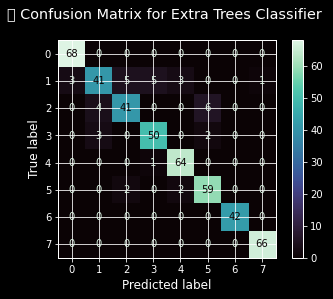

In [68]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

#### saving the model


In [69]:
filename="Final_Model classification 04"
joblib.dump(Final_Model,filename)

['Final_Model classification 04']

#### For Building Regression Model Split whole dataset into Two parts Namely X and Y

In [70]:
X=df.drop('capacity_mw',axis=1)
Y=df["capacity_mw"]

#### Feature Scaling


In [71]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.155327,-0.905807,1.174653,0.384586,1.578700,-1.059632
1,0.598448,-0.567933,-0.986874,0.671188,3.125148,0.400848
2,0.132019,-1.895590,1.606958,0.671188,-0.514953,0.400848
3,0.452596,3.134428,-0.554568,-0.116966,-0.491161,0.400848
4,0.141226,1.248497,-0.986874,0.671188,-0.491161,0.400848


we have done Standard Scaling to avoid the biasing of data



#### To find the Random state for our best ML model


In [72]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5342507568882502 on Random State 672


#### Machine Learning Model for Regression Model with Evaluation Matrix


In [73]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25, random_state=135)
    
    #trainning the Data
    classifier=model.fit(X_train,Y_train)
    
    #predict 
    pred=model.predict(X_test)
    
    #r2
    r2=(r2_score(pred,Y_test))*100
    print('r2_score',r2)
    
    #cv_score
    cv_score=cross_val_score(model,X,Y,cv=5).mean()*100
    print('cross_val_score',cv_score)
    
    #final result
    final_result=r2-cv_score          
    print('r2_score - cv_score =',final_result)

In [74]:
#LinearRegression
model=LinearRegression()
reg(model,X,Y)

r2_score -15.984241973710889
cross_val_score 41.93834317486533
r2_score - cv_score = -57.92258514857622


In [75]:
#support vector Regressor
model=SVR()
reg(model,X,Y)

r2_score 40.67826648064842
cross_val_score 50.844254351371475
r2_score - cv_score = -10.165987870723058


In [76]:
#Decision Tree Regressor
model=DecisionTreeRegressor()
reg(model,X,Y)

r2_score 42.74416847904595
cross_val_score 35.16098315736107
r2_score - cv_score = 7.58318532168488


In [77]:
#ExtraTrees Regressor
model=ExtraTreesRegressor()
reg(model,X,Y)

r2_score 58.749155434517405
cross_val_score 61.84181598006491
r2_score - cv_score = -3.0926605455475027


In [78]:
# Random Forest Regressor
model=RandomForestRegressor()
reg(model,X,Y)

r2_score 58.008607351043786
cross_val_score 62.44865956658365
r2_score - cv_score = -4.440052215539865


In [79]:
#AdaBoost Regressor
model=AdaBoostRegressor()
reg(model,X,Y)

r2_score 18.32781012447182
cross_val_score 55.4665152312411
r2_score - cv_score = -37.13870510676928


In [80]:
#Ridge
model=Ridge()
reg(model,X,Y)

r2_score -16.24511465078866
cross_val_score 41.942787445381505
r2_score - cv_score = -58.18790209617016


In [81]:
#Lasso
model=Lasso()
reg(model,X,Y)

r2_score -4.464214309476706e+32
cross_val_score -0.27438937492980653
r2_score - cv_score = -4.464214309476706e+32


#### Hyper Parameter tuning on our best ML Regression Model


In [82]:
#took ExtraTrees Regressor
fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [83]:
GSCV=GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [84]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [85]:
print(GSCV.best_score_)
print(GSCV.best_params_)

0.6091538228984883
{'criterion': 'mse', 'min_samples_split': 3, 'n_estimators': 200, 'n_jobs': 1, 'random_state': 42}


In [86]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 68.09997386756837


#### saving the best Regression Model


In [87]:
filename="Final_MOdel 05"
joblib.dump(Final_Model,filename)

['Final_MOdel 05']

#### ThankYou!!!